<a href="https://colab.research.google.com/github/emekeh/HDSC-Winter-23/blob/main/Stage_E_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practical Time Series Analysis & Forecast
The dataset for this quiz is [here](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv) 

In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

Dataset Description:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

The dataset is sampled on an hourly basis and has the following features:

**Attribute Information:**

- `FullDate`: Date in format yyyy-mm-dd hh:mm:ss
- `ElecPrice`: Prices of electricity charged in Kw per hour
- `GasPrice`: power generated was done via a gas power plant, gas price is the price of gas at time-T
- `SysLoad`: Total Load on system or Power consumed at time-T
- `Tmax`: maximum temperature at time-T

In [1]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load the dataset
url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(92016, 5)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
#check for missing values
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
# Summary statistics
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [6]:
# Convert the FullDate column to DateTime object
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.set_index("FullDate")

In [7]:
# Resampling from "hourly" to "daily" sample rate
daily_df = df.resample('D').sum()
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [8]:
print(daily_df.shape)
daily_df.corr()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
ElecPrice,0.004748,0.170524,0.352420,1.000000


##### Q. 11: Which of the following is a plot of `ElecPrice` over time?

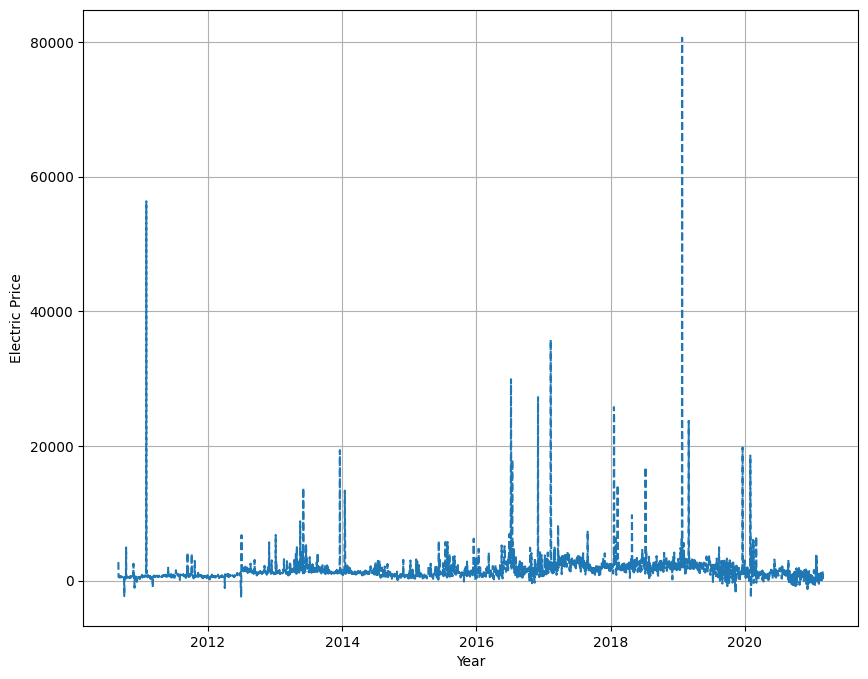

In [9]:
#plot of the daily global_active_power over time
plt.figure(figsize=(10,8))
plt.plot(daily_df.index, daily_df['ElecPrice'], '--')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price');

##### Q.12: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the `SysLoad` and `GasPrice` of the resampled Data set, to 6 decimal places?

In [10]:
# Perform ADF test on `SysLoad` and `GasPrice` columns
for col in ['SysLoad', 'GasPrice']:
    result = adfuller(daily_df[col])
    print(f"P-value for {col}: {result[1]:.6f}")

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


##### Q. 13: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of `GasPrice` and `ElecPrice` of the resampled Data set, to 4 decimal places?

In [11]:
# Perform ADF test on `GasPrice` and `ElecPrice` columns
for col in ['GasPrice', 'ElecPrice']:
    result = adfuller(daily_df[col])
    print(f'Critical values for {col}:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

Critical values for GasPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672
Critical values for ElecPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672


In [12]:
train = daily_df.iloc[:2757,:]
test = daily_df.iloc[2757:,:]

train.reset_index(inplace = True)
print('train shape:', train.shape)
print('test shape:', test.shape)
train.head()


train shape: (2757, 5)
test shape: (1077, 4)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [13]:
df_train = train.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [14]:
test.reset_index(inplace = True)
test.head()
df_test = test.iloc[:,[0,-1]]
df_test = df_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_test.head()


,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [15]:
# !pip install pystan~=2.14
# !pip install prophet

In [16]:
from prophet import Prophet
uni_model = Prophet()
uni_model.fit(df_train)

forecast_1 = uni_model.predict(df_test) 
forecast_1.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/061_8qbs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/1e9nuojc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77039', 'data', 'file=/tmp/tmpr1kwziq6/061_8qbs.json', 'init=/tmp/tmpr1kwziq6/1e9nuojc.json', 'output', 'file=/tmp/tmpr1kwziq6/prophet_modelywzfo95m/prophet_model-20230403153208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,105.008575,5165.912435,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,405.265758,5160.630679,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,300.692129,5133.014820,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,125.450728,4845.193661,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-118.585736,4684.867455,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


##### Q. 14: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [17]:
# Define the MAPE function
def metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = metric(df_test['y'], forecast_1['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is: 546.46


##### Q. 15: What is the RMSE in 2 decimal places?

In [18]:
rmse = np.sqrt(mean_squared_error(df_test['y'], forecast_1['yhat']))
print(f'The Mean Squared Error is: {round(rmse, 2)}')

The Mean Squared Error is: 3211.82


##### Q.16:	If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

**Answer: July**

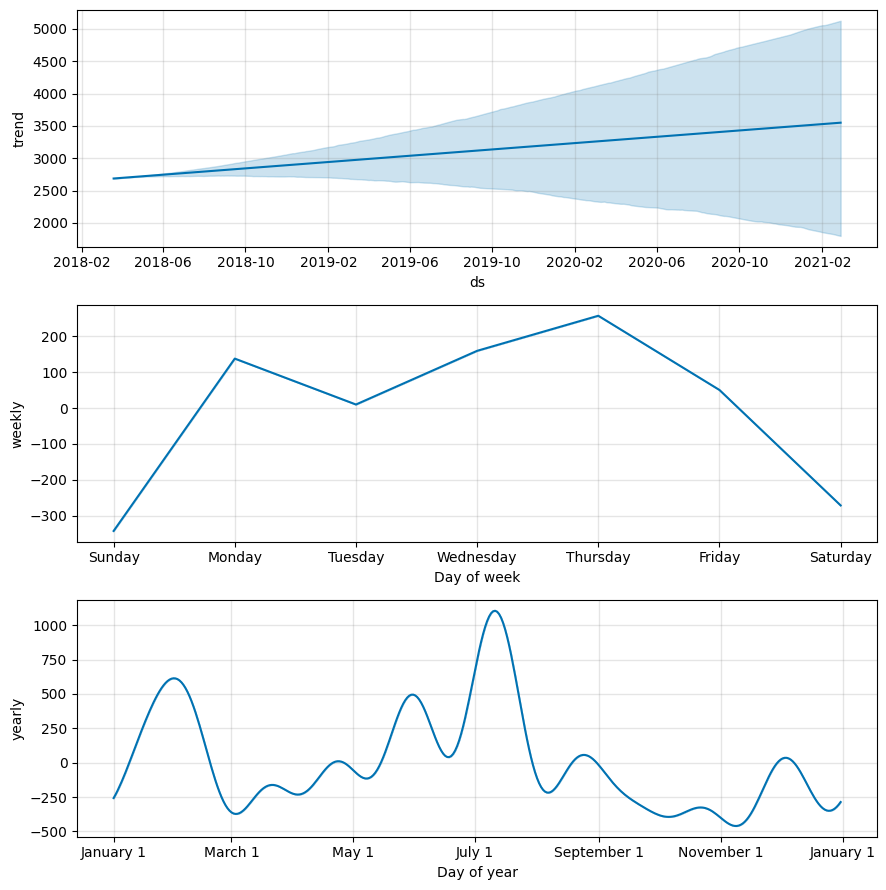

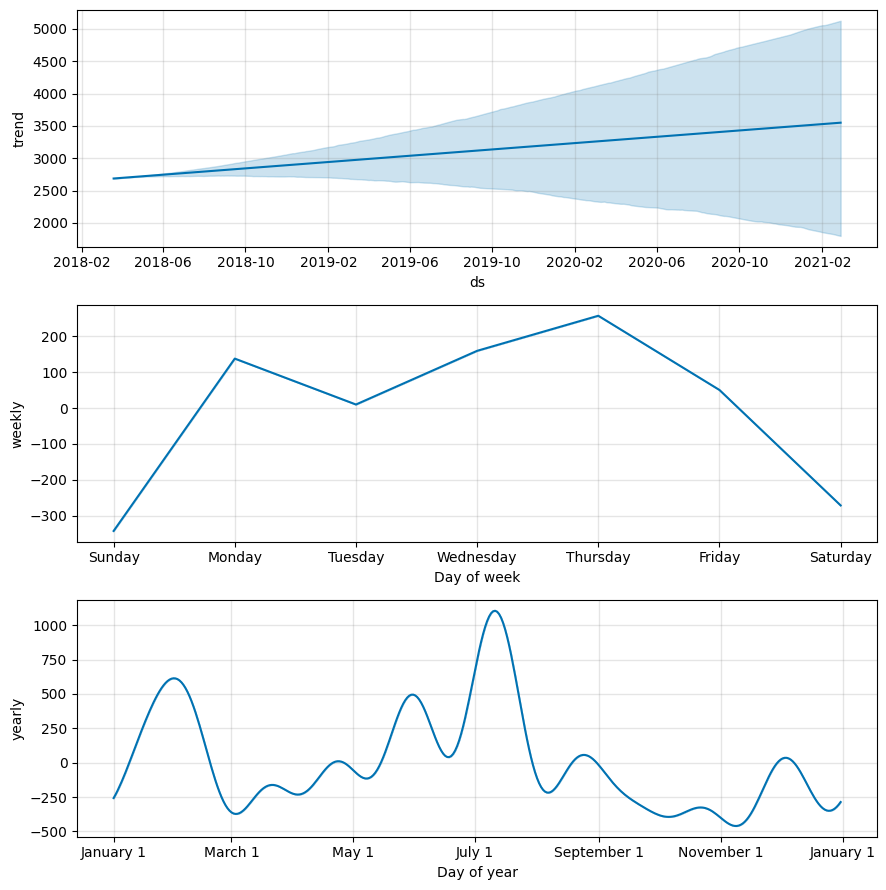

In [19]:
uni_model.plot_components(forecast_1)

In [20]:
daily_df.reset_index(inplace=True)
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


#### Train a multivariate time series model

In [21]:
##Setting the regression and prediction features for training
daily_df1 = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
daily_df1.head() 

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [22]:
train_1 = daily_df1.iloc[:2757,:]
test_1 = daily_df1.iloc[2757:,:]

multi_model = Prophet()

multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')

In [23]:
multi_model.fit(train_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/nq5100mx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/20c7uj87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23326', 'data', 'file=/tmp/tmpr1kwziq6/nq5100mx.json', 'init=/tmp/tmpr1kwziq6/20c7uj87.json', 'output', 'file=/tmp/tmpr1kwziq6/prophet_modelcdo4ioqz/prophet_model-20230403153211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
forecast_2 = multi_model.predict(test_1) 
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1868.766952,-140.910403,4228.103904,1868.766952,1868.766952,-856.432627,-856.432627,-856.432627,0.235437,...,-84.486668,-84.486668,-84.486668,-39.239438,-39.239438,-39.239438,0.0,0.0,0.0,1988.271381
1,2018-03-21,1869.459198,-234.891611,4203.677284,1869.459198,1869.459198,-1026.456513,-1026.456513,-1026.456513,0.232644,...,42.522333,42.522333,42.522333,-29.944537,-29.944537,-29.944537,0.0,0.0,0.0,1979.670349
2,2018-03-22,1870.151445,725.712490,5152.345916,1870.151445,1870.151445,-214.972629,-214.972629,-214.972629,0.219109,...,145.630770,145.630770,145.630770,-24.905253,-24.905253,-24.905253,0.0,0.0,0.0,2899.980665
3,2018-03-23,1870.843692,465.792519,4715.090879,1870.843692,1870.843692,-274.914740,-274.914740,-274.914740,0.211160,...,-44.303208,-44.303208,-44.303208,-23.980248,-23.980248,-23.980248,0.0,0.0,0.0,2584.190044
4,2018-03-24,1871.535938,-798.077125,3803.352134,1871.535938,1871.535938,-1076.504930,-1076.504930,-1076.504930,0.209226,...,-117.549683,-117.549683,-117.549683,-26.918797,-26.918797,-26.918797,0.0,0.0,0.0,1437.185558


##### Q. 17: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [25]:
mape = metric(test_1['y'],forecast_2['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is:232.73


##### Q. 18: What is the RMSE in 2 decimal places?

In [26]:
rmse = np.sqrt(mean_squared_error(test_1['y'],forecast_2['yhat']))
print(f'The Root Mean Squared Error (RMSE) is: {round(rmse, 2)}')

The Root Mean Squared Error (RMSE) is: 2708.53


##### Q. 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

**Answer: Thursday**

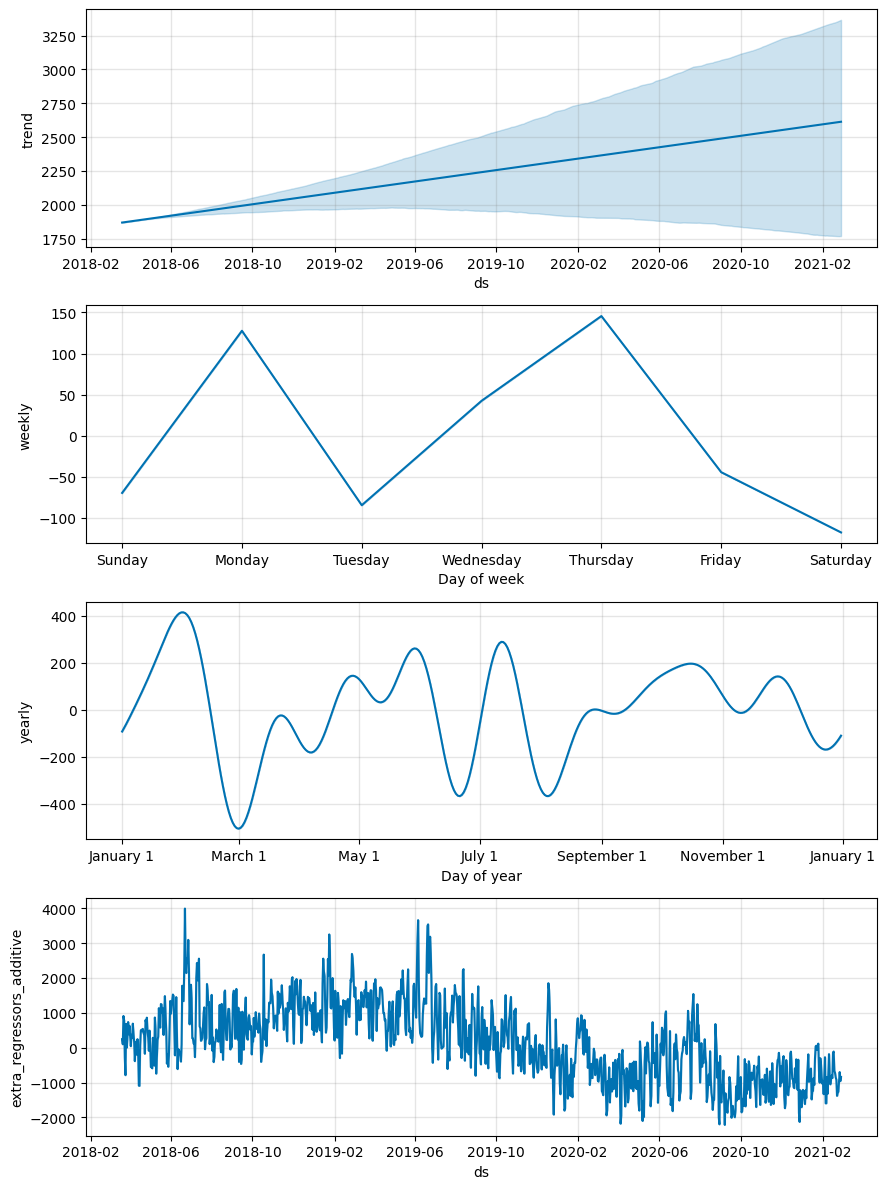

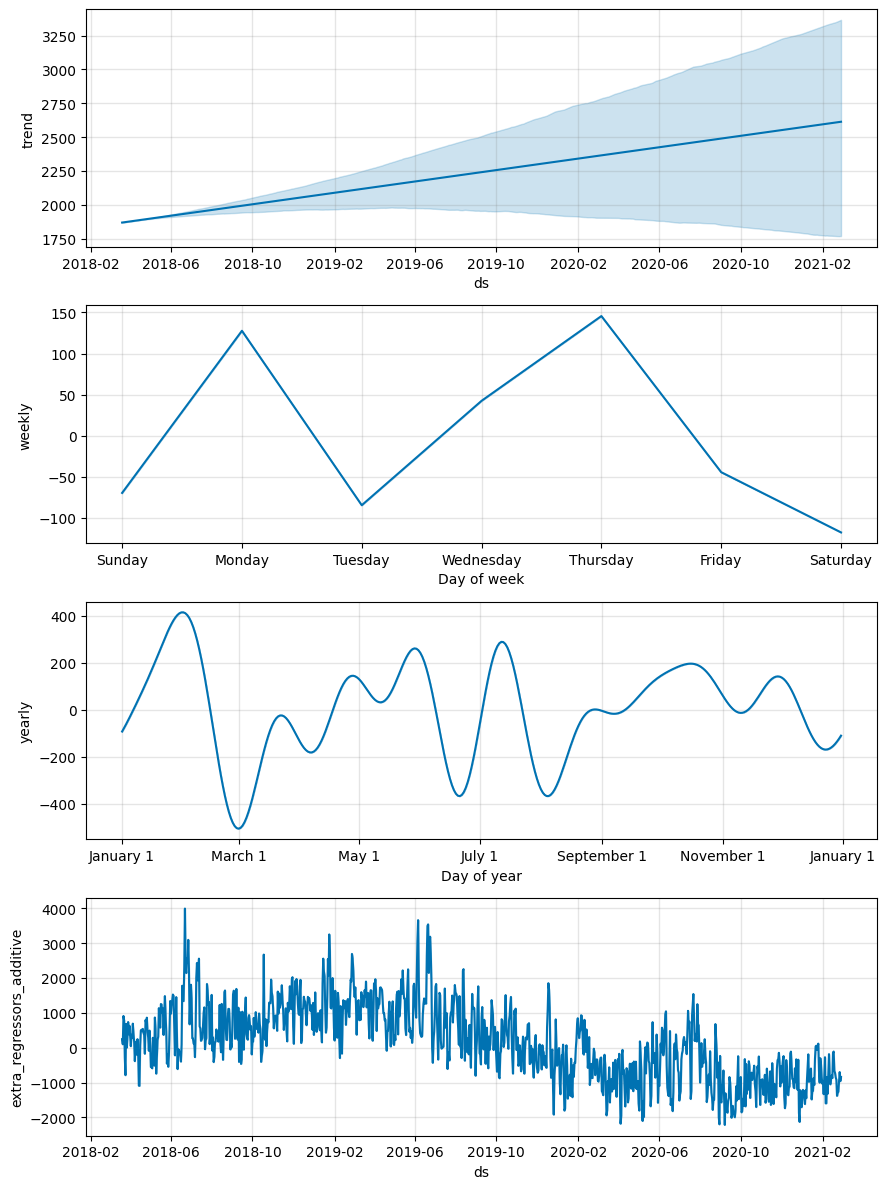

In [27]:
multi_model.plot_components(forecast_2)

#### Train a multivariate time series model performing the same train test split as before, but now exclude `Tmax` from the training data(drop `Tmax`),

In [28]:
train_2 = daily_df.iloc[:2757,:]
test_2 = daily_df.iloc[2757:,:]
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [29]:
daily_df2 = daily_df.drop(columns=['Tmax'], inplace=True)
daily_df2 = daily_df.rename(columns = {'FullDate':'ds',
                                       'SysLoad':'add1',
                                       'GasPrice':'add3',
                                       'ElecPrice':'y'})
daily_df2.head() 

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [30]:
df_train_2 = daily_df2.iloc[:2757,:]
df_test_2 = daily_df2.iloc[2757:,:]

In [32]:
# Create multivariate model without `Tmax'
multi_model = Prophet()
multi_model.add_regressor('add1')
multi_model.add_regressor('add3')
multi_model.fit(df_train_2)
forecast_3 = multi_model.predict(df_test_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/9fj0fej9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1kwziq6/4wzeysed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56522', 'data', 'file=/tmp/tmpr1kwziq6/9fj0fej9.json', 'init=/tmp/tmpr1kwziq6/4wzeysed.json', 'output', 'file=/tmp/tmpr1kwziq6/prophet_model29zk8odh/prophet_model-20230403153310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##### Q. 20: What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [33]:
mape = metric(df_test_2['y'], forecast_3['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error (MAPE) is:232.84
